In [175]:
import numpy as np
import matplotlib.pyplot as plt

In [176]:
def plot_advection_scheme(x, phi, phi0, scheme_name="Scheme"):
    plt.figure(figsize = (9, 6))
    plt.plot(x, phi, label=r'$\phi$')
    plt.plot(x, phi0, '--', label='Initial Condition')
    plt.title(f'1-D Advection-Diffusion using {scheme_name} Scheme')
    plt.xlabel('Spatial Domain (x)')
    plt.ylabel(r'Quantity $\phi$')
    plt.xlim(x[0], x[-1])
    plt.ylim(-0.1, 1.1)
    plt.grid(True)
    plt.legend()
    plt.show()

def compare_advection_schemes(schemes, x, initial_condition, v, dx, dt, nt):
    plt.figure(figsize = (9, 6))

    for scheme_name, scheme_func in schemes:
        phi_result = scheme_func(initial_condition, v, dx, dt, nt)
        plt.plot(x, phi_result, label=scheme_name)
    if isinstance(initial_condition, np.ndarray):
        plt.plot(x, initial_condition, '--', label='Initial Condition')

    plt.title(r"Comparison of 1-D Advection Schemes. ($\nu = 0$)")
    plt.xlabel('x')
    plt.ylabel(r'$\phi$')
    plt.xlim(x[0], x[-1])
    plt.ylim([-0.1, 1.1])
    plt.grid(True)
    plt.legend()
    plt.show()


def plot_advection_propagation(schemes, x, phi0, cfl, scheme_name = 'untitled'):
    phi_array = np.array([phi for _, phi in schemes])
    phi_min = np.min(phi_array)
    phi_max = np.max(phi_array)

    # Add 10% buffer to y-limits
    y_min = phi_min - 0.1 * abs(phi_min)
    y_max = phi_max + 0.1 * abs(phi_max)

    plt.figure(figsize=(10, 6))
    
    for label, phi in schemes:
        plt.plot(x, phi, label=label)
    
    plt.plot(x, phi0, '--', label='Initial Condition')
    plt.title(rf'{scheme_name} Propagation over Time $(\nu = 0)$\nCFL={cfl}')
    plt.xlabel('x')
    plt.ylabel(r'$\phi$')
    plt.xlim(x[0], x[-1])
    plt.ylim([y_min, y_max])
    plt.grid(True)
    plt.legend()
    plt.show()


### Advection - Diffusion Equation in 1-D.  ###
$$
\frac{\partial \phi}{\partial t} + v \frac{\partial \phi}{\partial x} = \nu \frac{\partial^2 \phi}{\partial x^2}
$$

Where

- $\phi$  = quantity of interest
- $t$    = time [sec]
- $x$    = spatial unit
- $v$     = constant advection speed
- $\nu$   = constant diffusivity coefficient

## Options for discretization ##

## $\frac{\partial \phi}{\partial t}$  ##
Temporal Term - First Derivative:  
- Forward Euler (Explicit)
- Backard Euler (Implicit)
- Crank-Nicolson (Average of Forward and Backward Euler)

## $v \frac{\partial \phi}{\partial x}$ ##
Spatial term - First Derivative:  
- Forward Difference
- Backward Difference
- Central Difference

Implementation 1: Forward-in-time, central-in-space (FT-CS)

## $\nu \frac{\partial^2 \phi}{\partial x^2}$ ##
Diffusion Term - Spatial Second Derivative:
- Central Difference  


Forward and backward differentiation lead to instability - more later.

## Implementation ##
We will consider pure advection cases such that  
$\nu \frac{\partial^2 \phi}{\partial x} = 0$  
e.g., perhaps diffusivity $\nu = 0$

In [177]:
# length of time domain
l = 1.0 
# number of grid points
nx = 101
# resolution of space
dx = l / (nx - 1)
x = np.linspace(0, l, nx)

# simulation time
t = 1.0
# number of time steps
nt = 250
# resolution of time step
dt = t / nt

# advection speed
v = 0.25
# diffusivity 
nu = 0

# Courant-Friederichs-Lewy number
cfl = v * dt / dx
print(f'Courant-Friedrichs-Lewy number: {cfl}')

def initial_condition(x):
    return np.exp(-100* (x - 0.5)**2)

phi0 = initial_condition(x)

Courant-Friedrichs-Lewy number: 0.1


## Case 1 - Forward-in-Time, Forward-in-Space (FT-FS) ##
Explicit

In [178]:
# Implementation of FT-FS

def solve_ft_fs(phi0, v, dx, dt, nt):
    """
    Solves the 1-D linear advection equation using :
    Forward Euler in time and Forward Difference in space (FT-FS)

    Parameters:
    - initial_condition:    1-D array of initialized phi values at each grid point
    - v:                    Advection speed
    - dx:                   Spatial step size
    - dt:                   Time step size
    - nt:                   Number of time steps

    Returns:
    - phi:                  Solution after nt time steps
    """
    phi = phi0.copy()
    nx = len(phi)
    cfl = v * dt / dx
    for n in range (nt):
        phi_new = phi.copy()
        for i in range (nx - 1):
            phi_new[i] = phi[i] - cfl * (phi[i+1] - phi[i])
        
        # Boundary Condition Enforcement
        phi_new[0] = phi[0] - cfl * (phi[0] - phi[-2])
        phi_new[-1] = phi_new[0]
        phi = phi_new.copy()

    return phi

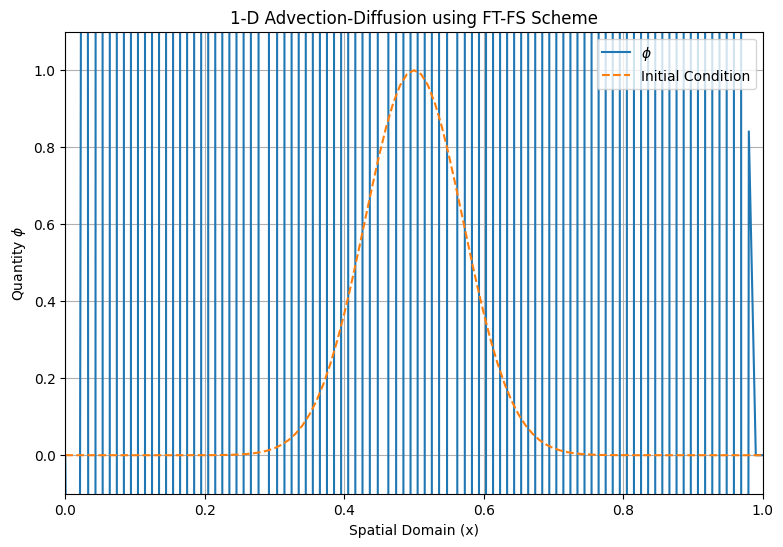

In [179]:
# Visualization of FT-FS
result_ft_fs = solve_ft_fs(phi0, v, dx, dt, nt)
plot_advection_scheme(x, result_ft_fs, phi0, "FT-FS")

## Case 2 - Forward-in-Time, Backward-in-Space (FT-BS) ##
Explicit

In [180]:
# Implementation of FT-BS

def solve_ft_bs(phi0, v, dx, dt, nt):
    """
    Solves the 1-D linear advection equation using :
    Forward Euler in time and Backward Difference in space (FT-BS)

    Parameters:
    - initial_condition:    1-D array of initialized phi values at each grid point
    - v:                    Advection speed
    - dx:                   Spatial step size
    - dt:                   Time step size
    - nt:                   Number of time steps

    Returns:
    - phi:                  Solution after nt time steps
    """
    phi = phi0.copy()
    nx = len(phi)
    cfl = v * dt / dx

    for n in range(nt):
        phi_new = phi.copy()
        for i in range (1, nx):
            phi_new[i] = phi[i] - cfl * (phi[i] - phi[i-1])
        
        # Boundary Condition Enforcement
        phi_new[0] = phi[0] - cfl * (phi[0] - phi[-2])
        phi_new[-1] = phi_new[0]
        phi = phi_new.copy()
    
    return phi

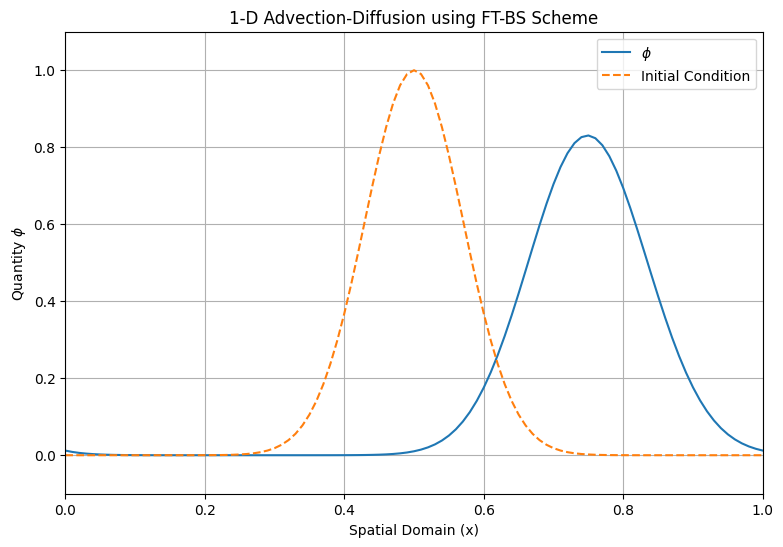

In [181]:
# Visualization of FT-BS

result_ft_bs = solve_ft_bs(phi0, v, dx, dt, nt)
plot_advection_scheme(x, result_ft_bs, phi0, 'FT-BS')

## Case 3 - Forward-in-Time, Central-in-Space (FT-CS)
Explicit

In [182]:
# Implementation of FT-CN

def solve_ft_cs(phi0, v, dx, dt, nt):
    """
    Solves the 1-D linear advection equation using :
    Forward Euler in time and Central in space (FT-BS)

    Parameters:
    - initial_condition:    1-D array of initialized phi values at each grid point
    - v:                    Advection speed
    - dx:                   Spatial step size
    - dt:                   Time step size
    - nt:                   Number of time steps

    Returns:
    - phi:                  Solution after nt time steps
    """
    phi = phi0.copy()
    nx = len(phi)
    cfl = v * dt / dx

    for n in range(nt):
        phi_new = phi.copy()
        for i in range (1, nx - 1):
            phi_new[i] = phi[i] - cfl/2 * (phi[i+1] - phi[i-1])
        
        # Boundary Condition Enforcement
        phi_new[0] = phi[0] - cfl * (phi[0] - phi[-2])
        phi_new[-1] = phi_new[0]
        phi = phi_new.copy()
    
    return phi

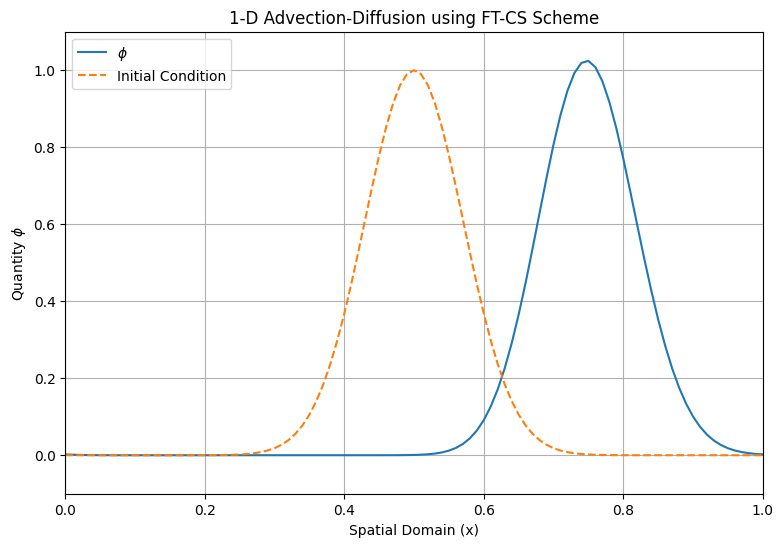

In [183]:
# Visualization of FT-BS

result_ft_cs = solve_ft_cs(phi0, v, dx, dt, nt)
plot_advection_scheme(x, result_ft_cs, phi0, 'FT-CS')

schemes = [
    ("init", )
]

## Comparison of Schemes ##

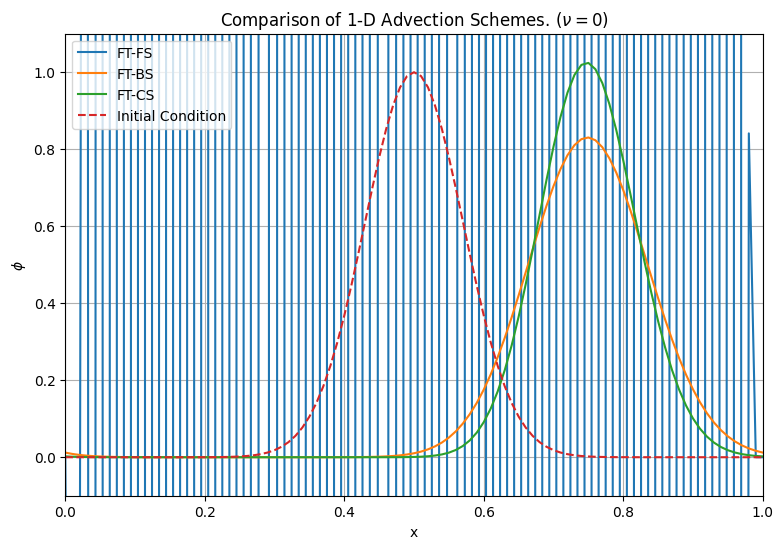

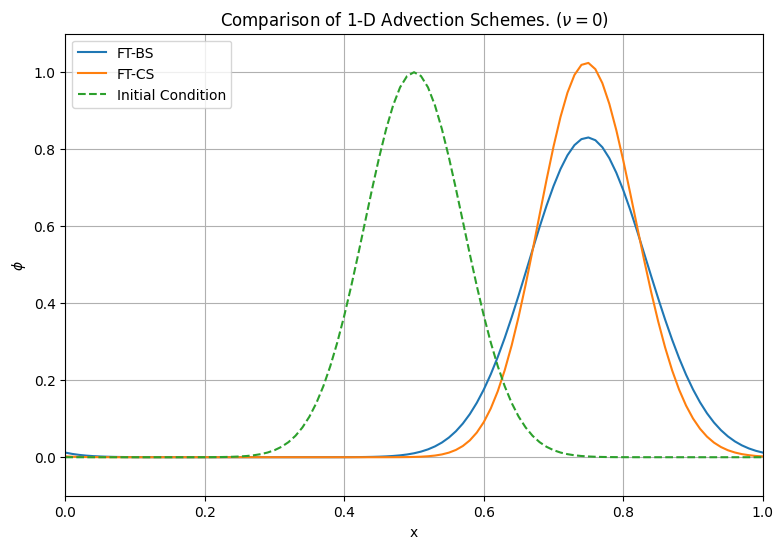

In [184]:
schemes = [
    ("FT-FS", solve_ft_fs),
    ("FT-BS", solve_ft_bs),
    ("FT-CS", solve_ft_cs)
]

compare_advection_schemes(schemes, x, phi0, v,dx, dt, nt)

schemes = [
    ("FT-BS", solve_ft_bs),
    ("FT-CS", solve_ft_cs)
]
compare_advection_schemes(schemes, x, phi0, v,dx, dt, nt)

## Allow the waves to step forward in time ##
The above example used a constant time period of 1 second with a 0.25 v pulse.  
We will now create an array of time values while holding wave speed constant to 'watch' the wave advect through the periodic domain.  

The time will be bounded by $ 0 < CFL < 1 $ allowing an allowable time interval to be resolved.

TypeError: min expected at least 1 argument, got 0

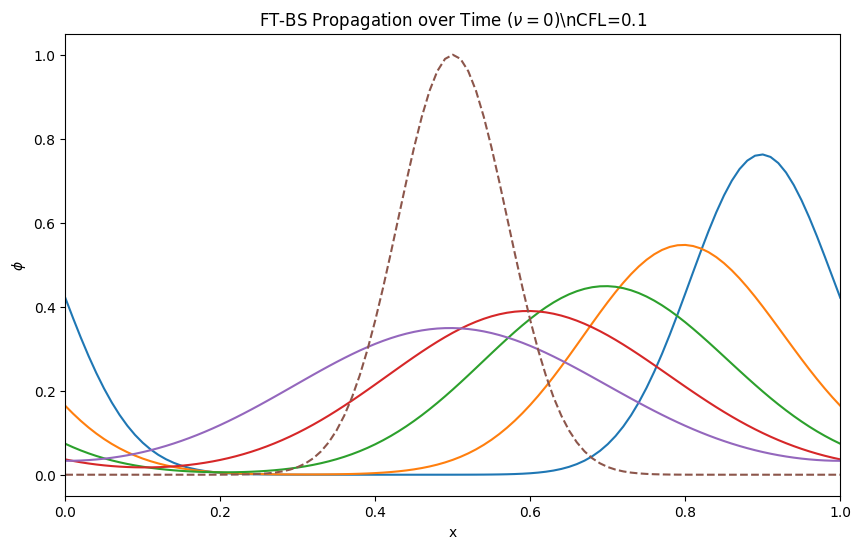

In [185]:
t_array = np.linspace(0.1, t, 5)

schemes = []
for t in t_array:
    nt = int(t / (v * dx * cfl))
    phi = solve_ft_bs(phi0, v, dx, dt, nt)
    label = f't = {t:0.3f}'
    schemes.append((label, phi))

plot_advection_propagation(schemes, x, phi0, cfl, scheme_name = 'FT-BS')

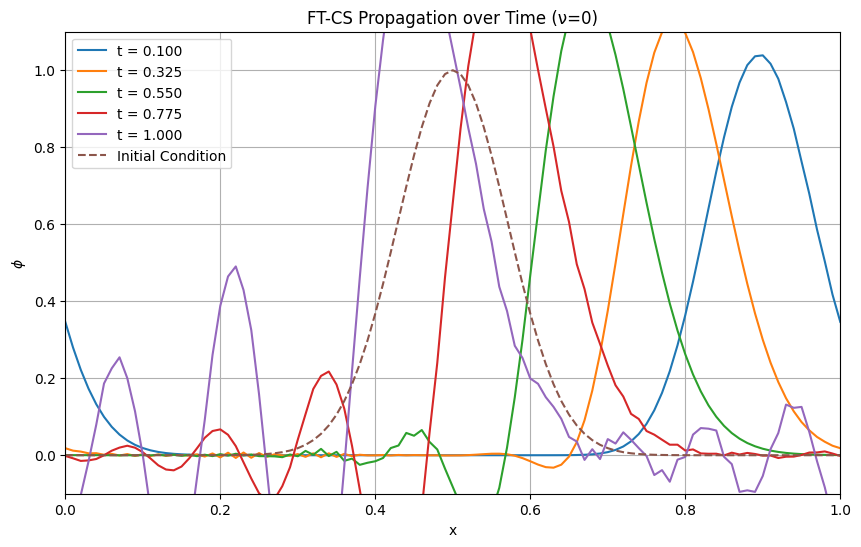

In [ ]:
schemes = []
for t in t_array:
    nt = int(t / (v * dx * cfl))
    phi = solve_ft_cs(phi0, v, dx, dt, nt)
    label = f't = {t:0.3f}'
    schemes.append((label, phi))

plot_advection_propagation(schemes, x, phi0, cfl, scheme_name = 'FT-CS')